https://scipy-lectures.org/advanced/scipy_sparse/introduction.html

# Introduction

__(dense) matrix__ is:
- mathematical object
- data structure for storing a 2D array of values

important features:
- memory allocated once for all items
    - usually a contiguous chunk, think NumPy ndarray
- fast access to individual items (*)

## Why Sparse Matrices?

- the memory, that grows like n**2
- small example (double precision matrix):

Text(0, 0.5, 'memory [MB]')

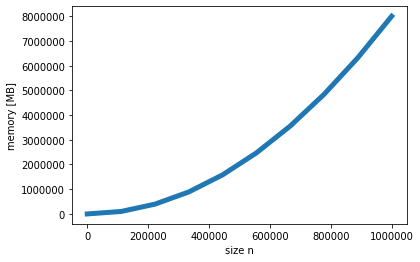

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1e6, 10)
plt.plot(x, 8.0 * (x**2) / 1e6, lw=5) 
plt.xlabel('size n')
plt.ylabel('memory [MB]')  

## Sparse Matrices vs. Sparse Matrix Storage Schemes
- sparse matrix is a matrix, which is almost empty
- storing all the zeros is wasteful -> store only nonzero items
- think compression
- pros: huge memory savings
- cons: depends on actual storage scheme, (*) usually does not hold

## Typical Applications
- solution of partial differential equations (PDEs)
    - the finite element method
    - mechanical engineering, electrotechnics, physics, …
- graph theory
    - nonzero at (i, j) means that node i is connected to node j
- natural language processing
    - nonzero at (i, j) means that the document i contains the word j

spy() from matplotlib
example plots:

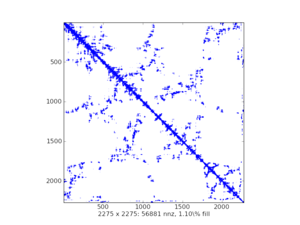 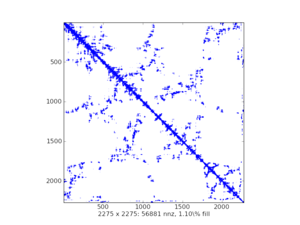

# Storage Schemes

- seven sparse matrix types in scipy.sparse:
    - csc_matrix: Compressed Sparse Column format
    - csr_matrix: Compressed Sparse Row format
    - bsr_matrix: Block Sparse Row format
    - lil_matrix: List of Lists format
    - dok_matrix: Dictionary of Keys format
    - coo_matrix: COOrdinate format (aka IJV, triplet format)
    - dia_matrix: DIAgonal format
- each suitable for some tasks
- many employ sparsetools C++ module by Nathan Bell
- assume the following is imported:
```
import numpy as np
import scipy.sparse as sps
import matplotlib.pyplot as plt
```
- warning for NumPy users:
    - the multiplication with ‘*’ is the matrix multiplication (dot product)
    - not part of NumPy!
        - passing a sparse matrix object to NumPy functions expecting ndarray/matrix does not work

## Common Methods

- all scipy.sparse classes are subclasses of spmatrix
    - default implementation of arithmetic operations
        - always converts to CSR
        - subclasses override for efficiency
    - shape, data type set/get
    - nonzero indices
    - format conversion, interaction with NumPy (toarray(), todense())
    - …

- attributes:
    - mtx.A - same as mtx.toarray()
    - mtx.T - transpose (same as mtx.transpose())
    - mtx.H - Hermitian (conjugate) transpose
    - mtx.real - real part of complex matrix
    - mtx.imag - imaginary part of complex matrix
    - mtx.size - the number of nonzeros (same as self.getnnz())
    - mtx.shape - the number of rows and columns (tuple)
- data usually stored in NumPy arrays